### Standard & Poor's (S&P 500 index):
- Preprocessing.
- Preparation and Visualization.

### Importing Libraries 

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np # for numerical operations
import seaborn as sns #visualisation
import matplotlib.pyplot as plt # visualization
%matplotlib inline 
import matplotlib.ticker as ticker # Library to customize ticks
from datetime import date
import holidays
from scipy import stats

import warnings # filter warnings
warnings.filterwarnings('ignore')

The selected source for the experiment is Yahoo Finance, through the integration of the yfinance library and jupyter.
- Timeframe selected for the project is 10 years (2014-2023).
- The frequency to be used is business day, the selection is because the market is open during these days.
- The period include real world scenarios such as Brexit in 2016 and Covid-19.
- Is also believed that in 10 years of data, volatility and trends are present in the market.

The last trading day 2013 is also being imported due to critical importante in some of the approaches.

### Importing dataset from yahoo finance (yfinance library).

In [2]:
# Defines ticker symbol for S&P 500 index.
ticker_symbol = "^GSPC"

# Fetch historical data.
sp500_data = yf.download(ticker_symbol, start="2013-12-31", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


The command display provides an overview of the dataset: 
- Head: First five rows.
- Tail: Last five rows.
- Shape: Number of rows and columns.

### Data PreProcessing 

In [3]:
display(sp500_data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,1842.609985,1849.439941,1842.410034,1848.359985,1848.359985,2312840000
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


- The dataset is composed by 2517 rows and 6 features. In this present project the Close feature will be the focus of the study, representing the closing index at the end of the trading day.

In [4]:
# Check for missing values
missing_values = sp500_data.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


- The S&P 500 index dataset imported from yfinance is composed by 2517 observations and 6 features.

The dataset does not present outliers at this point. However, by observind the first five rows it is noticeable that there are not five days in a row (business days), therefore holidays on weekdays might have been excluded from the set due to no trading activity.

In [5]:
# Define start and end dates - 10 years period.
start_date = '2013-12-31'
end_date = '2023-12-31'

# Generate business days between the start and end dates
business_days = pd.bdate_range(start=start_date, end=end_date)

# Get the total number of business days
total_business_days = len(business_days)

print("Total number of business days between", start_date, "and", end_date, "is:", total_business_days)

Total number of business days between 2013-12-31 and 2023-12-31 is: 2609


The calendar within the selected period has 2609 business days, having more days than the number of rows in the dataset, providing more evidence for the exclusion of holidays on weekdays (no trading). 
- weekends could be considered noise (market is closed).
- by analysing just the business days it can be focused on days that the market is actually open, reducing the amount of noise which could affect the model performance. 

<b> After the models have being implemented a second round of models can be applied using daily frequency, which will include all the seven days (addition not only of holidays on weekdays, but also, weekends).

- Check the performance of the models and compare what frequency techniques performs better or worse. In addition, check if the introduction of noise (handling missing values) affected the models and justify even deeper the choice for the frequency.

In [6]:
# Defining start and end dates (ten years timeframe)
start_date = date(2013, 12, 31)
end_date = date(2023, 12, 31)

# Get all US business holidays between start_date and end_date
us_holidays = holidays.US()

# Create a complete date range covering all weekdays
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Filter out holidays that fall on weekdays
us_business_holidays = [holiday for holiday in us_holidays.keys() if holiday in all_weekdays]

# Filter out weekends
weekdays = all_weekdays.difference(pd.to_datetime(us_business_holidays))

# Create DataFrame with all weekdays
weekdays_df = pd.DataFrame({'Date': weekdays})

# Set 'Date' column as index
weekdays_df.set_index('Date', inplace=True)

# Create DataFrame with S&P 500 data
df = pd.DataFrame(sp500_data, columns=['Close'])

# Merge the two DataFrames on the index
merged_df = weekdays_df.merge(df, left_index=True, right_index=True, how='left')

# Convert back to Series
df_BF = merged_df

# Display the updated Series
display(df_BF)

,Close
Date,
2013-12-31,1848.359985
2014-01-01,NaN
2014-01-02,1831.979980
2014-01-03,1831.369995
2014-01-06,1826.770020
...,...
2023-12-25,NaN
2023-12-26,4774.750000
2023-12-27,4781.580078


- After the inputation of the holidays the number of entries match with the total (2608), which was generated by the previous code.
- The inputed missing days were added with NaN values, which will have to be addressed. 

In [7]:
# Check for missing values
missing_values = df_BF.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Close    92
dtype: int64


In [8]:
# Checking if there's any consecutive missing values in the Close indexes. 
# Converting NaN checks to integers (1 for True, 0 for False).
nan_series = df_BF['Close'].isna().astype(int)

# Rolling window size 3 and sum to identify consecutive NaNs
consecutive_nans = nan_series.rolling(window=3).sum() == 3

# Check for any occurrence of more than two consecutive NaNs
has_consecutive_nans = consecutive_nans.any()

print(f"Two consecutive NaNs in 'Close' column? {has_consecutive_nans}")


Two consecutive NaNs in 'Close' column? False


- Since there are no consecutive missing values, linear regression methods might not be the best option.

During this 10 years period, the market had 92 holidays on business days.
<b> Assuming that technically the close value of the last trading day will maintain untill the following trading day.

Since the main focus of the project is the Close column, many options can be applied to fill the missing values (holidays) and each one of them having a trade off of pros and cons. Techniques using the next opening to fill the previous, linear regression and others (depending on the performance).
The selected approach to handle the missing values is the foward fill and the reasons relies on: 
- The S&P500 index does not suffers any change when the market is closed;
- It can reduce the amount of noise by not adding artificial data;
- It represents more accurate real-world scenario;

The rationales were thought out to perform time-series analysis (forecasting) with the dataset. 

Other options such as back-fill using the open index of the next day could be considered. On one hand can present events that might impact the stock market, on the other hand it can introduce bias to the models, by "seing" future data. 

In [9]:
# Forward fill NaN values in the 'Close' column.
df_BF.fillna(method='ffill', inplace=True)

# Display the updated DataFrame with forward filled values.
display(df_BF)

,Close
Date,
2013-12-31,1848.359985
2014-01-01,1848.359985
2014-01-02,1831.979980
2014-01-03,1831.369995
2014-01-06,1826.770020
...,...
2023-12-25,4754.629883
2023-12-26,4774.750000
2023-12-27,4781.580078


In [10]:
# Check for missing values
missing_values = df_BF.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Close    0
dtype: int64


In [11]:
sp500_data['Close'].describe()

count    2517.000000
mean     3005.423258
std       901.454132
min      1741.890015
25%      2124.199951
50%      2798.030029
75%      3906.709961
max      4796.560059
Name: Close, dtype: float64

In [12]:
df_BF.describe()

,Close
count,2609.000000
mean,3005.472863
std,901.733128
min,1741.890015
25%,2124.199951
50%,2793.899902
75%,3902.620117
max,4796.560059


Looking at the statistical properties of the S&P500 data (withouy any imputations) and the df_BF (with imputations), it is observable that the properties barely changed, the biggest difference are in the 50% (-4.13) and 75% (-4.09). However, taking into consideration the scale the change is not significant. 

The statistical features of the imputed dataframe, the df_BF:
- The variable ranges from 1741.89 to 4796.56
- It has a mean (average) of 3005.92.
- The standard deviation is 901.62, and in the present context can be considered high because it represents almost 30% of the avg value, but also, taking into consideration the scale of the min and max values. 

Other imputation techniques can be applied later to check the results and implications of each approach to handle the missing values.

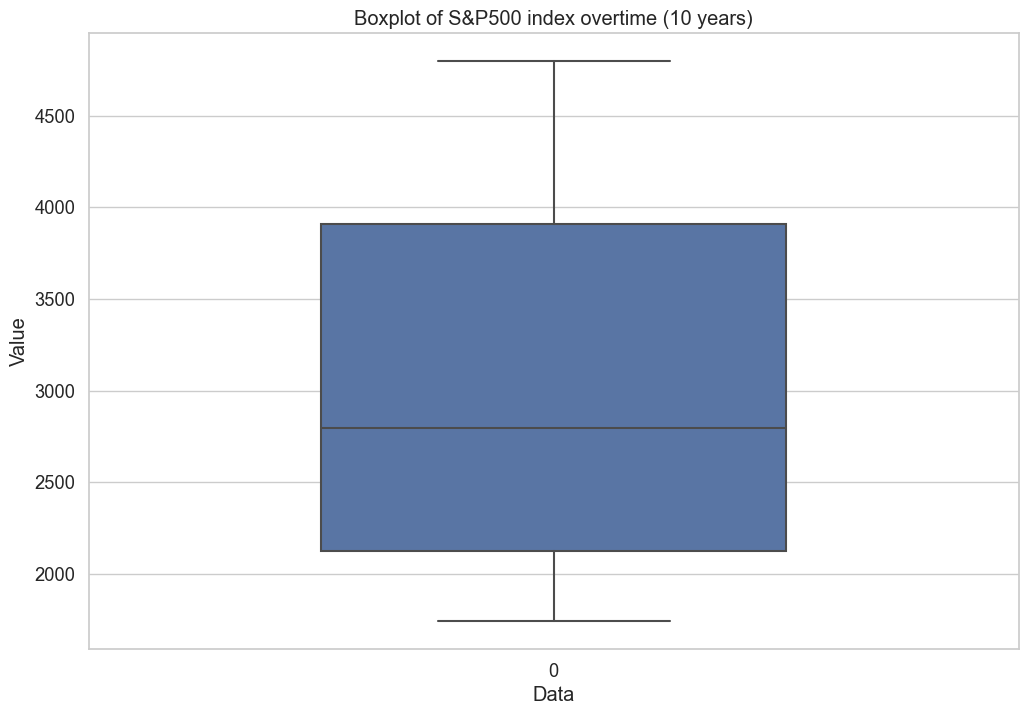

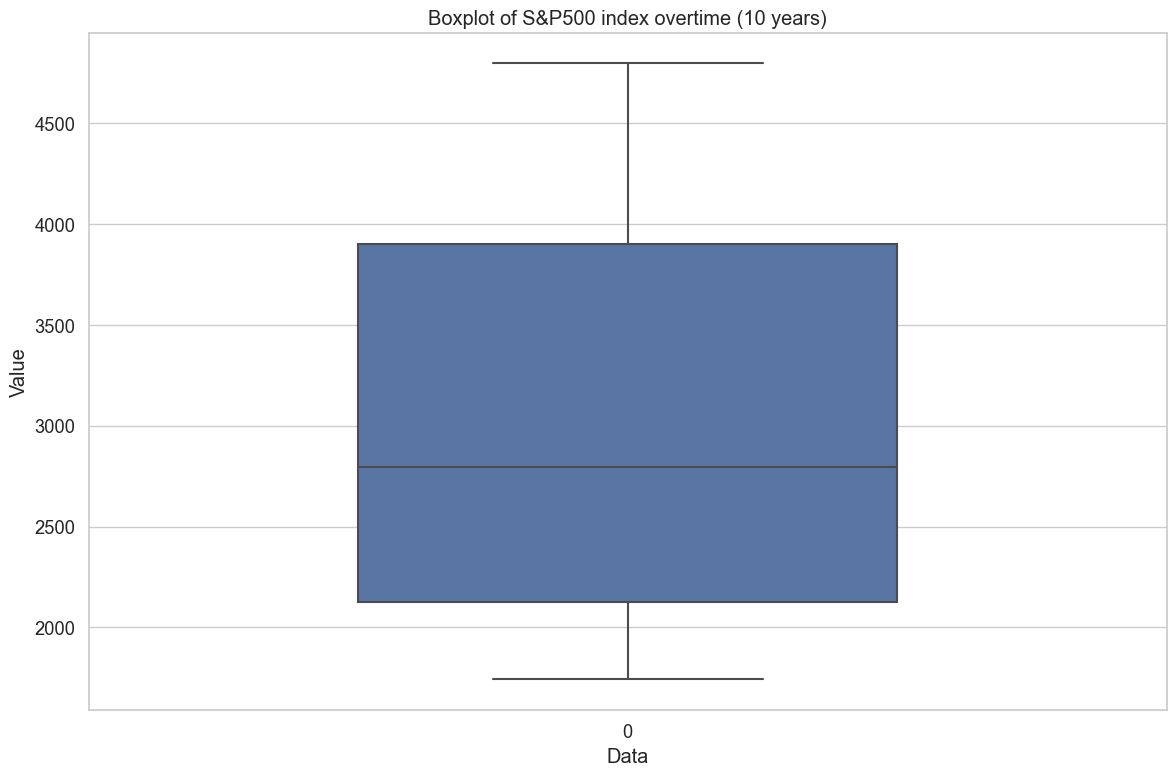

In [13]:
plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=sp500_data['Close'], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('Data') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index overtime (10 years)') # Sets title to tle boxplot.

plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=df_BF['Close'], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('Data') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index overtime (10 years)') # Sets title to tle boxplot.

plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.

- The .describe along with the boxplot shows that the mean is above the median indicating a skewness towards higher values.
- According to the boxplot, the close variable does not present any values outside of the skewers, which might indicate that outliers are not present. Although, tests can be performed after checking the distribution of the data.
- Also between the original dataset and with imputed "business days" barely suffered any changes when looking at the boxplots

### Distribution of Close index

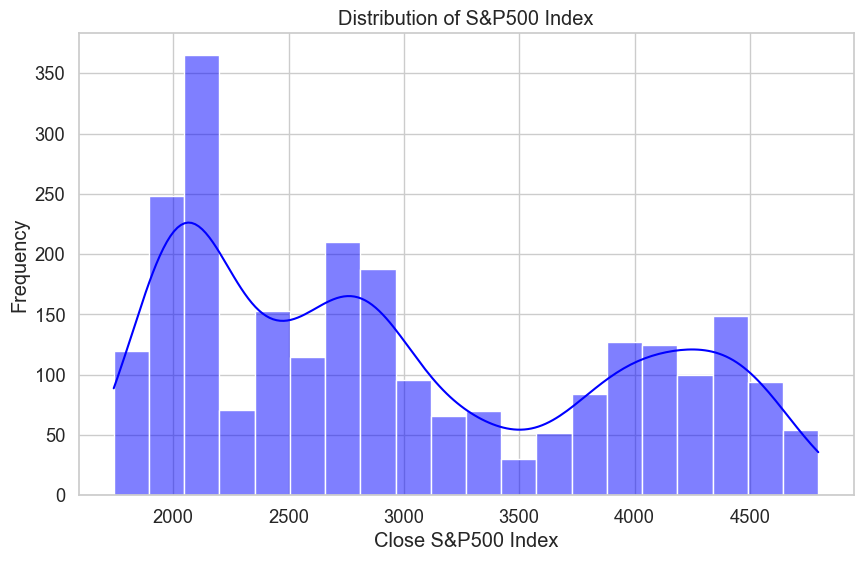

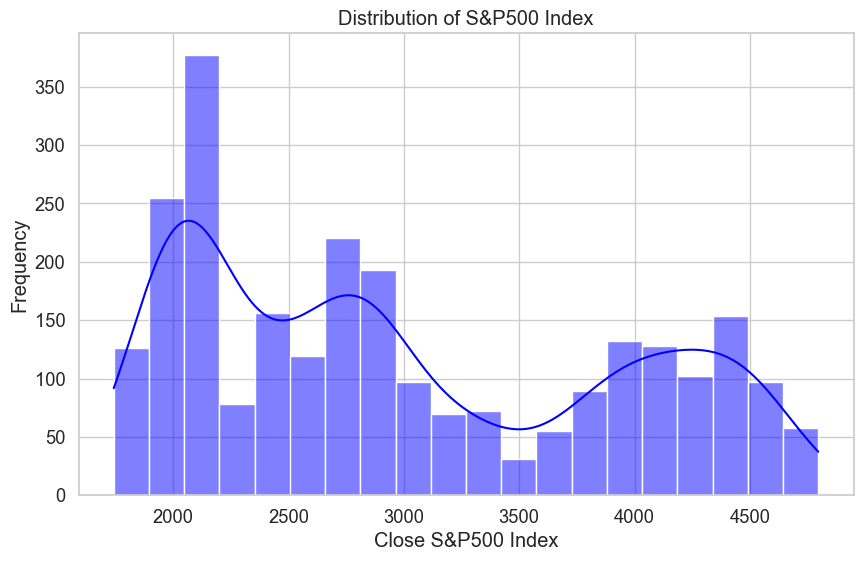

In [14]:
# Distribution plot of Close prices
plt.figure(figsize=(10, 6))
sns.histplot(sp500_data['Close'], bins=20, kde=True, color='blue')
plt.title('Distribution of S&P500 Index')
plt.xlabel('Close S&P500 Index')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_BF['Close'], bins=20, kde=True, color='blue')
plt.title('Distribution of S&P500 Index')
plt.xlabel('Close S&P500 Index')
plt.ylabel('Frequency')
plt.show()

- The distribution of the data has not change from the original to the inputted business days (holiday).
- The S&P 500 index presents a multimodal distribution of values, in its distribution plot and the KDE curve shows three different peaks. Despite trying different number of bins, multiple peaks were still present.

The assumption to be followed is that the data has a multimodal distribution. 

### Outliers and Skewness

Based on the distribution, standard test such as IQR, MAD, Z-Score cannot be considered appropriate.
- The IQR method to identify outliers does not fit this case, because is indicated for unimodal distributions.
- Z-score, follows the same assumption as the IQR.
- The MAD, the three different peaks could indicate that are values clustered around them. Thus, this method could generate misleading results.

<b> Other complex techniques? Feature engineering?

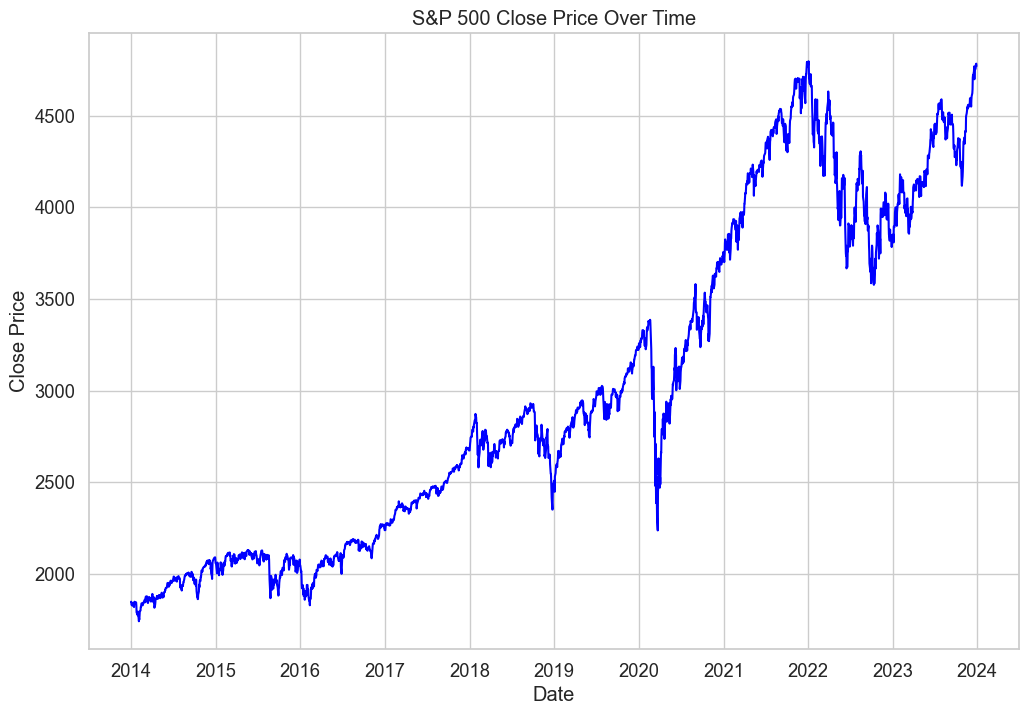

In [15]:
# Plotting
plt.figure(figsize=(12, 8))

# Time Series Plot of Close Price
plt.plot(df_BF.index, df_BF['Close'], color='blue')
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

- The lineplot of the index overtime shows that has an upwards trend.

#### Feature Engineering - Calculating S&P 500 index return

Objectives:
- Feature with different characteristcs, such as distribution.
- Enhance time-series models;

In [16]:
# This cell calculates the index return based on the close value and will drop the first row (resulting in nan value)

# Calculate daily stock returns
df_BF['daily_stock_return'] = df_BF['Close'].pct_change()

# Drop rows with NaN values
df_BF.dropna(inplace=True)

# Displays the dataset with the new column (the stock returns).
display(df_BF)

,Close,daily_stock_return
Date,,
2014-01-01,1848.359985,0.000000
2014-01-02,1831.979980,-0.008862
2014-01-03,1831.369995,-0.000333
2014-01-06,1826.770020,-0.002512
2014-01-07,1837.880005,0.006082
...,...,...
2023-12-25,4754.629883,0.000000
2023-12-26,4774.750000,0.004232
2023-12-27,4781.580078,0.001430


In [17]:
# Calculate the minimum and maximum values in the column
min_value = df_BF['daily_stock_return'].min()
max_value = df_BF['daily_stock_return'].max()

# Print the minimum and maximum values
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: -0.11984055240393443
Maximum value: 0.09382773976227554


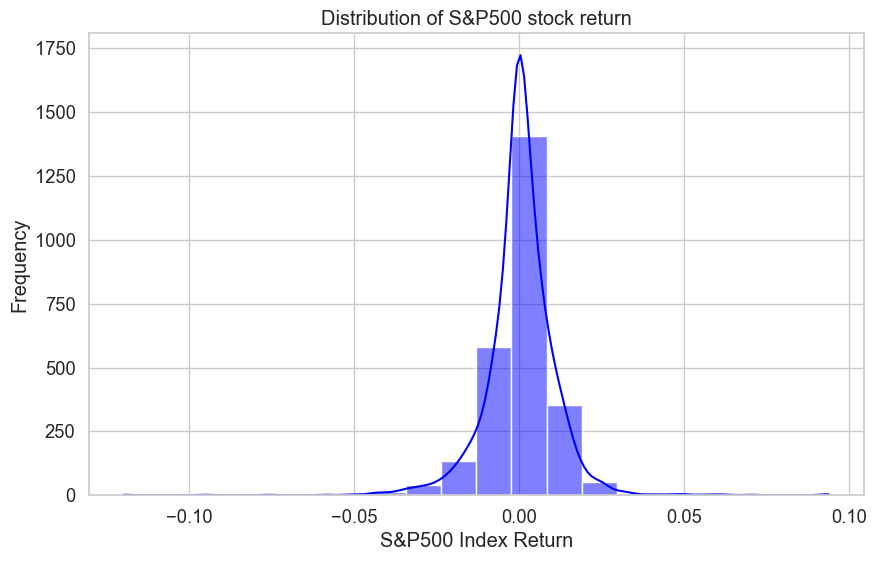

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_BF['daily_stock_return'], bins=20, kde=True, color='blue')
plt.title('Distribution of S&P500 stock return')
plt.xlabel('S&P500 Index Return')
plt.ylabel('Frequency')
plt.show()

- After performing feature engineering, the new feature index return indicates a normal distribution, making previous techniques to identify outliers appropriate. 

In [19]:
Q1 = df_BF['daily_stock_return'].quantile(0.25)
Q3 = df_BF['daily_stock_return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_BF['daily_stock_return'][(df_BF['daily_stock_return'] < lower_bound) | (df_BF['daily_stock_return'] > upper_bound)]

# Check if there are outliers
if outliers.empty:
    print("No outliers detected.")
else:
    print("Outliers detected:")
    print(outliers)

Outliers detected:
Date
2014-01-24   -0.020875
2014-02-03   -0.022832
2014-04-10   -0.020885
2014-07-31   -0.019999
2014-10-09   -0.020661
                ...   
2023-03-09   -0.018459
2023-04-27    0.019566
2023-05-05    0.018475
2023-11-02    0.018859
2023-11-14    0.019075
Name: daily_stock_return, Length: 206, dtype: float64


In [20]:
# Detect outliers using Z-score method
z_scores = stats.zscore(df_BF['daily_stock_return'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = df_BF.index[outliers]
print('Outlier indices:', outlier_indices)


Outlier indices: DatetimeIndex(['2015-08-24', '2015-08-26', '2016-06-24', '2018-02-05',
               '2018-02-08', '2018-10-10', '2018-12-26', '2019-01-04',
               '2020-02-24', '2020-02-27', '2020-03-02', '2020-03-04',
               '2020-03-05', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-20', '2020-03-24', '2020-03-26',
               '2020-03-27', '2020-03-30', '2020-04-01', '2020-04-06',
               '2020-04-08', '2020-06-11', '2020-09-03', '2020-10-28',
               '2022-04-29', '2022-05-05', '2022-05-18', '2022-06-13',
               '2022-06-16', '2022-08-26', '2022-09-13', '2022-11-10'],
              dtype='datetime64[ns]', name='Date', freq=None)


Text(0.5, 1.0, 'Boxplot of S&P500 index return (10 years)')

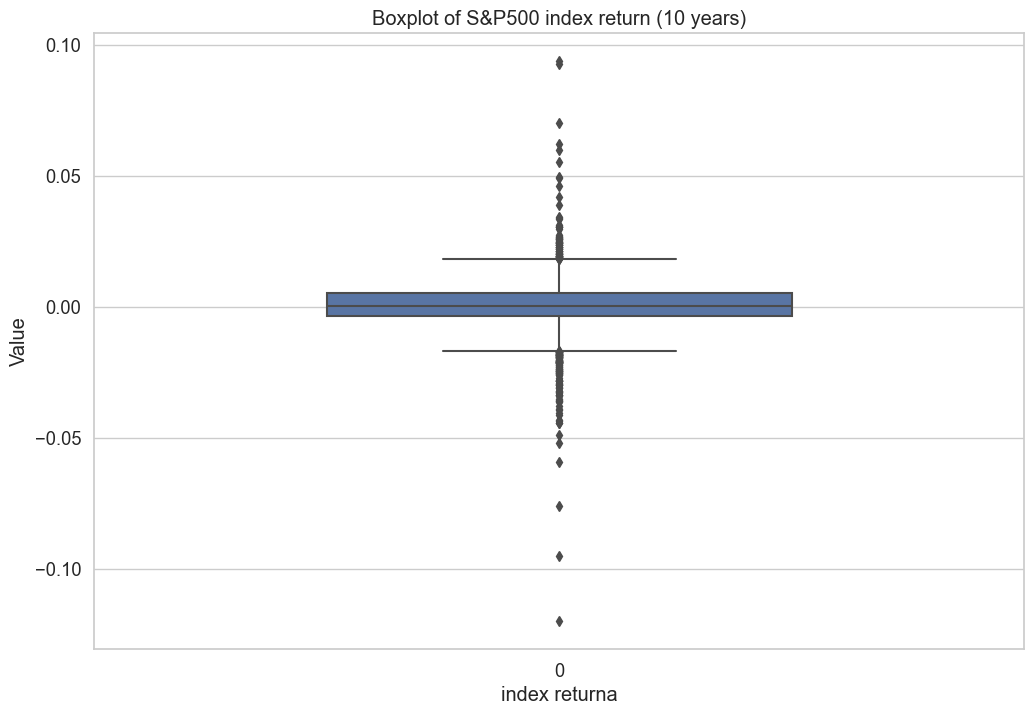

In [21]:
plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=df_BF['daily_stock_return'], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('index returna') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index return (10 years)') # Sets title to tle boxplot.

By analysing the outliers of return:
- The IQR shows that 206 outliers are present.
- The Z-score also accused the presence of outliers.
-The boxplot also showed numerous data points outside of the skewers.


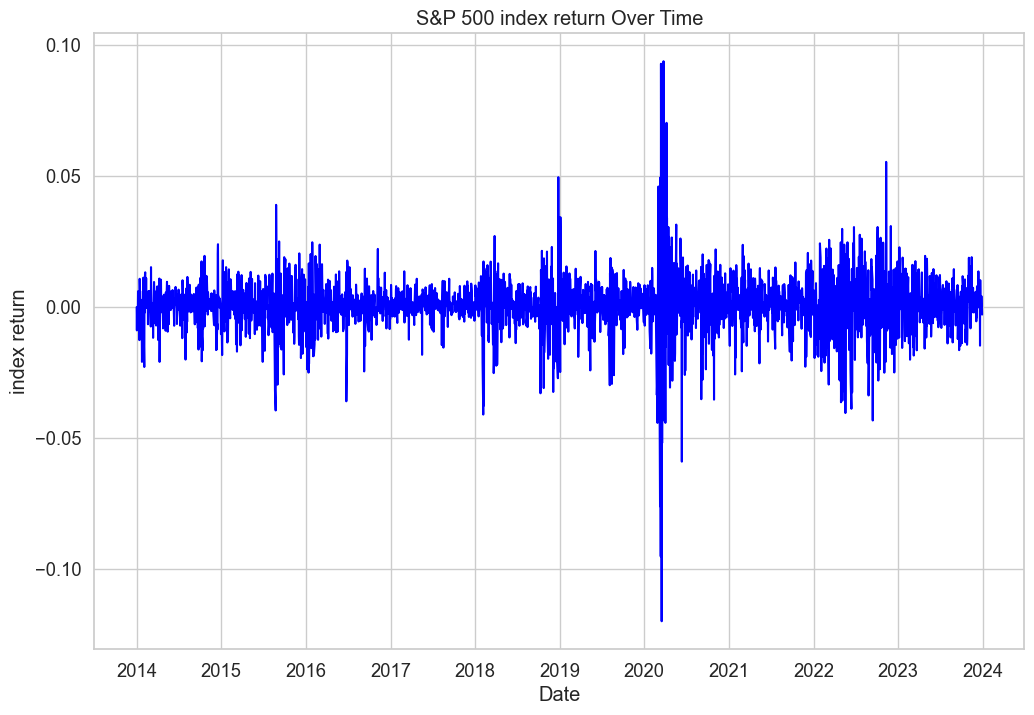

In [22]:
# Plotting
plt.figure(figsize=(12, 8))

# Time Series Plot of Close Price
plt.plot(df_BF.index, df_BF['daily_stock_return'], color='blue')
plt.title('S&P 500 index return Over Time')
plt.xlabel('Date')
plt.ylabel('index return')

plt.show()

- The lineplot of the index return had a significant change, it does not have a trend anymore and visually it looks even more appropriate for time-series approaches. 

### Timeframe selected for the second section is from 01/01/00 to 31/12/23

In [23]:
# Fetch historical data
df = yf.download(ticker_symbol, start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [24]:
display(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [25]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values:")
print(missing_values)

Missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6037 non-null   float64
 1   High       6037 non-null   float64
 2   Low        6037 non-null   float64
 3   Close      6037 non-null   float64
 4   Adj Close  6037 non-null   float64
 5   Volume     6037 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.1 KB


In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6037.000000,6037.000000,6037.000000,6037.000000,6037.000000,6.037000e+03
mean,1973.302234,1984.955333,1960.794329,1973.586551,1973.586551,3.327312e+09
std,1061.063967,1066.402460,1055.531844,1061.335875,1061.335875,1.509315e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1191.369995,1198.739990,1184.359985,1191.380005,1191.380005,2.093720e+09
50%,1457.150024,1465.709961,1448.359985,1457.339966,1457.339966,3.442920e+09
75%,2581.929932,2596.270020,2572.149902,2584.840088,2584.840088,4.159760e+09
max,4804.509766,4818.620117,4780.979980,4796.560059,4796.560059,1.145623e+10


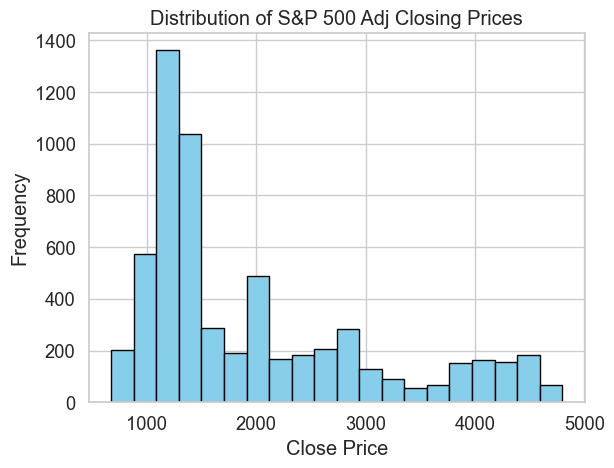

In [28]:
plt.hist(df['Adj Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of S&P 500 Adj Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

- The Adjusted Close values are highly right-skewed. 

The following cells will check for outliers and experimentation of techniques.

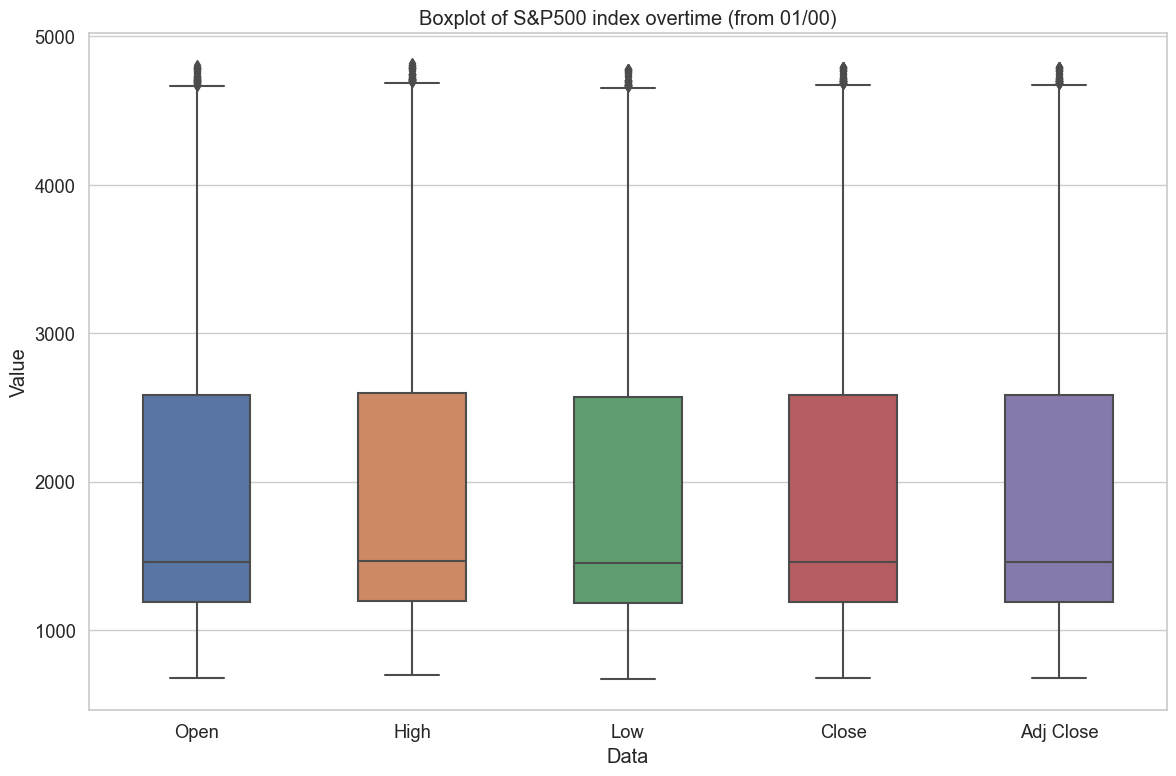

In [29]:
# Boxplot, a visualization technique that uses the IQR method. 

plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=df[['Open','High','Low','Close','Adj Close']], width=0.5) # Sets the width to 0.5
 # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('Data') # Adds x-axis label.
ax.set_ylabel('Value') # Adds y-axis label.
ax.set_title('Boxplot of S&P500 index overtime (from 01/00)') # Sets title to tle boxplot.

plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.

In [30]:
Q1 = df['Adj Close'].quantile(0.25)
Q3 = df['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df['Adj Close'][(df['Adj Close'] < lower_bound) | (df['Adj Close'] > upper_bound)]

# Check if there are outliers
if outliers.empty:
    print("No outliers detected.")
else:
    print("Outliers detected:")
    print(outliers)

Outliers detected:
Date
2021-11-04    4680.060059
2021-11-05    4697.529785
2021-11-08    4701.700195
2021-11-09    4685.250000
2021-11-12    4682.850098
2021-11-15    4682.799805
2021-11-16    4700.899902
2021-11-17    4688.669922
2021-11-18    4704.540039
2021-11-19    4697.959961
2021-11-22    4682.939941
2021-11-23    4690.700195
2021-11-24    4701.459961
2021-12-07    4686.750000
2021-12-08    4701.209961
2021-12-10    4712.020020
2021-12-15    4709.850098
2021-12-22    4696.560059
2021-12-23    4725.790039
2021-12-27    4791.189941
2021-12-28    4786.350098
2021-12-29    4793.060059
2021-12-30    4778.729980
2021-12-31    4766.180176
2022-01-03    4796.560059
2022-01-04    4793.540039
2022-01-05    4700.580078
2022-01-06    4696.049805
2022-01-07    4677.029785
2022-01-11    4713.069824
2022-01-12    4726.350098
2023-12-13    4707.089844
2023-12-14    4719.549805
2023-12-15    4719.189941
2023-12-18    4740.560059
2023-12-19    4768.370117
2023-12-20    4698.350098
2023-12-21    

In [31]:
# Looking for outliers using the percentile method (0.05 - 0.95)

# Define the lower and upper percentile thresholds
lower_percentile = df['Adj Close'].quantile(0.05)
upper_percentile = df['Adj Close'].quantile(0.95)

# Identify outliers
outliers_percentile = df[(df['Adj Close'] < lower_percentile) | (df['Adj Close'] > upper_percentile)]

# Display outliers
print("Outliers detected using Percentile method:")
print(outliers_percentile)


Outliers detected using Percentile method:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2002-07-16   917.929993   918.650024   897.130005   900.940002   900.940002   
2002-07-17   901.049988   926.520020   895.030029   906.039978   906.039978   
2002-07-18   905.450012   907.799988   880.599976   881.559998   881.559998   
2002-07-19   881.559998   881.559998   842.070007   847.750000   847.750000   
2002-07-22   847.760010   854.130005   813.260010   819.849976   819.849976   
...                 ...          ...          ...          ...          ...   
2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883  4754.629883   
2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000  4774.750000   
2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078  4781.580078   
2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098  4783.350098   
2023-12-2

#### Because of the distribution of the data, the percentile technique presented way more outliers than the IQR. Therefore, the chosen approach will be the IQR, which is more appropriate when the data is skewed. 

In [32]:
# Not appropriate, the data is not normally distributed so it could provide wrong insights regarding outliers.

#from scipy.stats import zscore
#df['Z_score'] = zscore(df['Adj Close'])
#outliers = df[abs(df['Z_score']) > 3]

# Check if there are outliers
#if outliers.empty:
#    print("No outliers detected.")
#else:
#    print("Outliers detected:")
#    print(outliers)

In [33]:
# Calculate the median absolute deviation (MAD)
median = df['Adj Close'].median()
mad = np.median(np.abs(df['Adj Close'] - median))

# Define a threshold for outliers (e.g., 3 times the MAD)
threshold_mad = 3 * mad

# Identify outliers using the MAD method
outliers_mad = df[np.abs(df['Adj Close'] - median) > threshold_mad]

# Display outliers detected by the MAD method
print("Outliers detected using MAD method:")
print(outliers_mad)


Outliers detected using MAD method:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   
2018-01-09  2751.149902  2759.139893  2747.860107  2751.290039  2751.290039   
2018-01-10  2745.550049  2750.800049  2736.060059  2748.229980  2748.229980   
...                 ...          ...          ...          ...          ...   
2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883  4754.629883   
2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000  4774.750000   
2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078  4781.580078   
2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098  4783.350098   
2023-12-29  4782

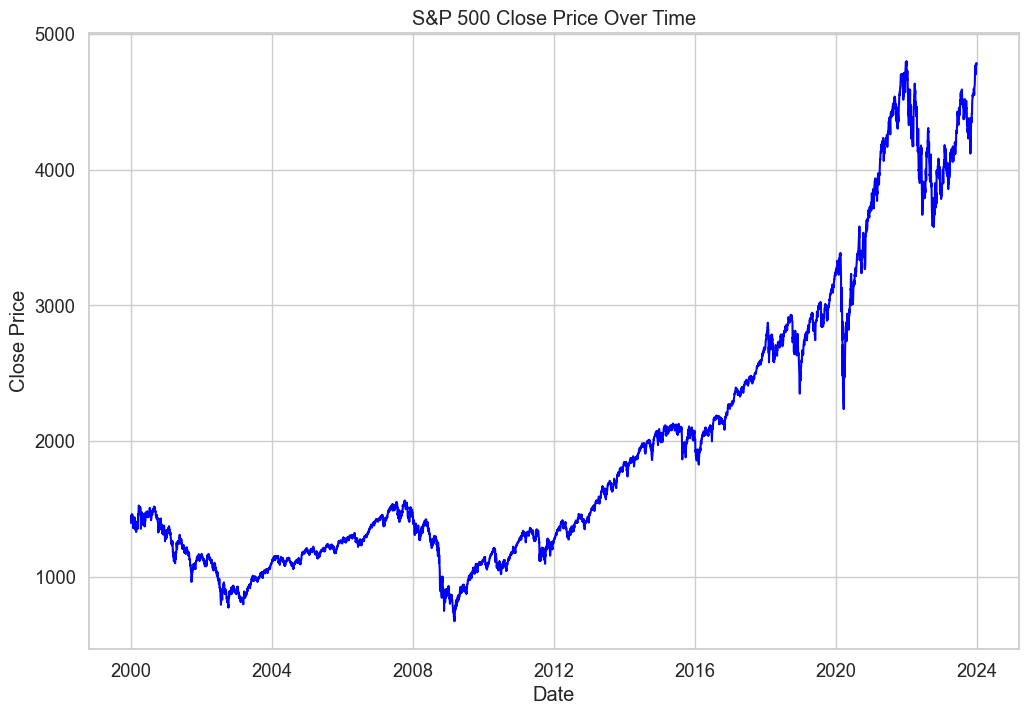

In [34]:
# Plotting
plt.figure(figsize=(12, 8))

# Time Series Plot of Close Price
plt.plot(df.index, df['Adj Close'], color='blue')
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()